# Guided Project: Investigating Fandango Movie Ratings

This guided project is about finding out whether Fandango, an online movie ratings aggregator is still inflating ratings after a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest.

## Understanding the Data

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

before = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [117]:
before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [118]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [119]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


Both datasets contain columns that we don't need to answer the question whether Fandango is still inflating ratings. We are only going to take the relevant columns about fandango, the movie, and the year of release.

In [120]:
fandango_before = before[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes",
                        "Fandango_Difference"]].copy()
fandango_after = after[["movie","year","fandango"]].copy()

In [121]:
fandango_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [122]:
fandango_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


The goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for the analysis is made of all the movies stored on Fandango's website, regardless of the year of release.

The data we're using was sampled at the moments we want, one sample before the analysis and one sample after the analysis was done. However, we need to be sure that the samples are representative otherwise we should expect a large sampling error.

The first sample used the following criteria:

- The movie should have had at least 30 fan reviews on Fandango on the date of sampling(Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

It is very clear that this sample is not random because not every movie had the same chance to be included in the sample. It is very unlikely that the sample is representative for the population. The sample is also subject to temporal trends, movies from 2015 could have been very good or very bad compared to previous years for example.

The second sample used the following criteria:

- The movie must have been released in 2016 or 2017.
- The movie must have had a significant number of votes

The second sample is also subject to temporal trends and is thus unlikely to be representative for the population.

## Changing the Goal of our Analysis

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

Our new goal is to determine whether there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

## Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

In [123]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


After checking every movie's fan rating in the sample, it can be concluded that 90% of the movies are popular. This is sufficient.

In [124]:
#Checking Hickey's dataset
sum(fandango_before["Fandango_votes"] < 30)

0

Next, we want to isolate the movies that released in 2015 and the movies that released in 2016 in separate datasets.

In [125]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


There is no 'Year' column in Hickey's dataset, we need to extract the year from the strings in the 'FILM' column and create a 'Year' column and then isolate the movies that released in 2015.

In [126]:
#Create 'Year' column by extracting the years from the string in the 'FILM' column
fandango_before["Year"] = fandango_before["FILM"].str[-5:-1]

In [127]:
fandango_before["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [128]:
fandango_2015 = fandango_before[fandango_before["Year"] == "2015"].copy()

In [129]:
fandango_2016 = fandango_after[fandango_after["year"] == 2016].copy()

In [130]:
fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

In [131]:
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

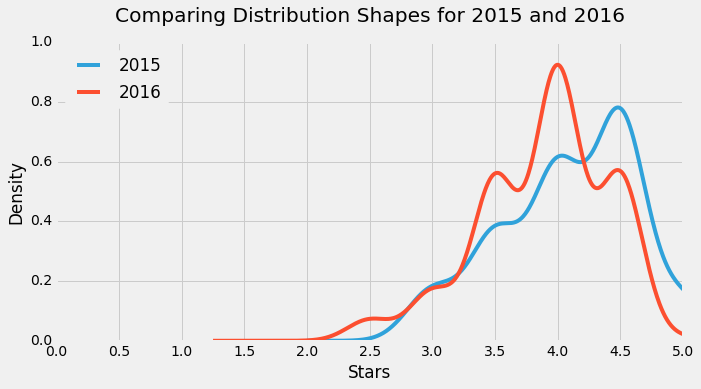

In [140]:
%matplotlib inline
plt.style.use("fivethirtyeight")
fandango_2015["Fandango_Stars"].plot.kde(label = "2015", legend = True, figsize=(10,5))
fandango_2016["fandango"].plot.kde(label = "2016", legend = True)
plt.title("Comparing Distribution Shapes for 2015 and 2016", y=1.05)
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

It can be noted that both plots are left skewed, this means that movies generally are rated higher on Fandango. The shift on the 2016 distribution signifies that in 2016 ratings in general were lower than in 2015.

## Comparing Relative Frequencies

In [144]:
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [146]:
fandango_2016["fandango"].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2015, the amount of movies rated 5.0 and 4.5 was much higher than in 2016. This indicates that the ratings in 2016 were lower than in 2015, as mentioned previously.

In [149]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean","median","mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


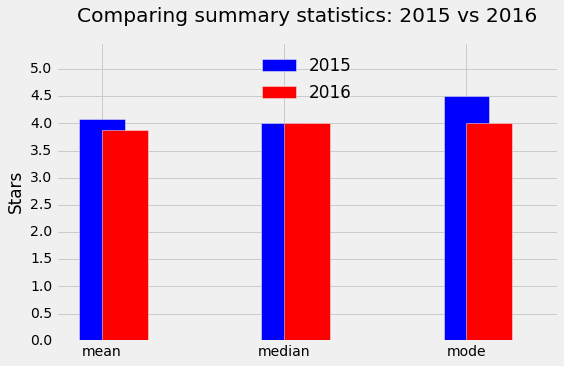

In [184]:
plt.style.use("fivethirtyeight")

summary["2015"].plot.bar(legend = True, color = "blue", align ="center", width=.25, figsize=(8,5))
summary["2016"].plot.bar(legend = True, color = "red", align ="edge", width=.25, rot=0)
plt.title("Comparing summary statistics: 2015 vs 2016", y = 1.05)
plt.ylabel("Stars")
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.legend(framealpha = 0, loc="upper center")
plt.show()

In 2016 the mean and the mode dropped, this indicates that the average rating dropped and the most frequent rating as well.